# Gender distsribution across the years.

In order to decide the gender of a person, the `gender_guesser` library can be used to analyse the first name. Running
```python
import sys
!{sys.executable} -m pip install gender_guesser --user
```
should install the package.

In [2]:
import gender_guesser.detector as gender # Gender detector for first names.
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
df = pd.read_json("imdb_dataset_parsed.json")

# Keep only useful columns and remove NaNs.
df = pd.DataFrame(df[['year', 'actors', 'directors']].dropna())

df['year'] = df['year'].astype(int)

# Aggregate entries by year.
df = df.groupby('year', as_index = False).agg({'actors':'sum', 'directors':'sum'})

# 2019 has very few entries, drop that row.
df = df[df['year'] != 2019]

In [4]:
def malePercentage(row, column_name):
    actors_list = row[column_name]
    genders = []
    
    # Load gender detector.
    d = gender.Detector(case_sensitive = False)
    
    for name in actors_list:
        name = name.split(' ')
        # Transforms names like ['J.', 'Stuart', 'Blackton'] in ['Stuart', 'Blackton'].
        name = [x for x in name if not x.endswith(".")]
        # Some names might now be empty.
        if name:
            genders.append(d.get_gender(name[0]))
        
    # Consider only 'male' or 'female' results,
    # excluding 'unknown', 'mostly_male' and 'mostly_female'.
    genders = list(filter(lambda gen: gen == 'male' or gen == 'female', genders))
        
    return genders.count('male')/len(genders)

In [5]:
df['act_male_perc'] = df.apply(lambda row: malePercentage(row, 'actors'), axis = 1)
df['dir_male_perc'] = df.apply(lambda row: malePercentage(row, 'directors'), axis = 1)

In [9]:
df.head()

,year,actors,directors,act_male_perc,dir_male_perc
0,1910,"[Marcia Moore, Roscoe 'Fatty' Arbuckle, Nick C...","[Otis Turner, Tom Santschi, Theodore Wharton, ...",0.687500,1.000000
1,1911,"[Wilfred Lucas, Claire McDowell, Edna Foster, ...","[D.W. Griffith, Sidney Olcott]",0.666667,1.000000
2,1912,"[Robert Gemp, Frederick Warde, Albert Gardner,...","[André Calmettes, James Keane, J. Stuart Black...",0.720000,1.000000
3,1913,"[Mary Pickford, Owen Moore, Ernest Truex, Ogde...","[J. Searle Dawley, Alice Guy, Charles Giblyn, ...",0.728916,0.950000
4,1914,"[George Nash, Gail Kane, Julia Hurley, Robert ...","[George Irving, Jack Pratt, 1 more credit, Lou...",0.683250,0.952941


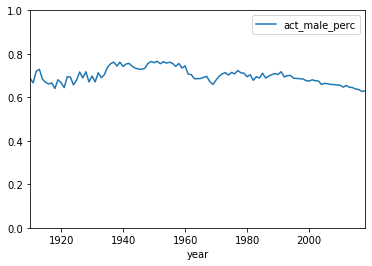

In [18]:
df.plot(x = 'year', y = 'act_male_perc', ylim = (0, 1))

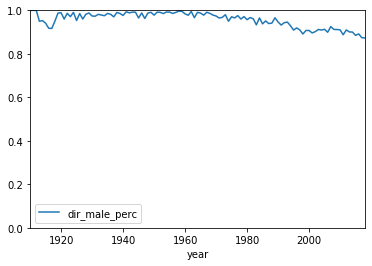

In [17]:
df.plot(x = 'year', y = 'dir_male_perc', ylim = (0, 1))